<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">1. Introduction</p>
</div>

![](https://s.yimg.com/ny/api/res/1.2/LBYyf4E0lYuxdOuzliICgQ--/YXBwaWQ9aGlnaGxhbmRlcjt3PTI0MDA7aD0xNjIwO2NmPXdlYnA-/https://media.zenfs.com/en/parents_articles_5/29219d41be2b994761c5c0522e21e43f)


Source: https://s.yimg.com/ny/api/res/1.2/LBYyf4E0lYuxdOuzliICgQ--/YXBwaWQ9aGlnaGxhbmRlcjt3PTI0MDA7aD0xNjIwO2NmPXdlYnA-/https://media.zenfs.com/en/parents_articles_5/29219d41be2b994761c5c0522e21e43f

The datesets "kid_iq.csv" and child_iq.csv were sourced from Kaggles. The goal of this research is to use these datasets to analyse and predict  a child's IQ from the mother's features using machine learning, providing insights into the factors that may influence cognitive development in children. This is an end-to-end  machine learning project

Column Description: The columns in each of the datasets are listed below:

Kids_iq dataset

 - kid_score:	Target variable. A measure of the child’s cognitive ability or IQ score.
 - mom_hs:	Binary indicator: whether the mother completed high school (1 = yes, 0 = no).
 - mom_iq:	Mother's IQ score — a continuous variable, typically standardized.
 - mom_work:	Categories 1 to 4.
 - mom_age:	Mother's age at the time of the child's birth or data collection.

child_iq dataset
 - ppvt:	Peabody Picture Vocabulary Test score – a proxy for the child’s verbal ability or cognitive development. Often used in early childhood assessment.
 - educ_cat:	Mother's education category – usually an ordinal value (e.g., 1 = less than HS, 2 = HS grad, 3 = some college, 4 = college grad).
 - momage: Mother's age at the time of the child's birth or data collection.

In [128]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import math
import streamlit as st
import shap
shap.initjs()


In [129]:
# reading the datasets into pandas dataframe
df1 = pd.read_csv('kid_iq.csv')
df2 = pd.read_csv('child_iq.csv')

In [130]:
# displaying the first five rows of the kid iq dataset
df1.head()

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27


In [131]:
# displaying the first five rows of the child iq dataset
df2.head()

,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26


In [132]:
# dimension of the kid dataset
df1.shape

(434, 6)

In [133]:
# dimension of the child dataset
df2.shape

(400, 4)

In [134]:
# dataframe information for kid iq dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  434 non-null    int64  
 1   kid_score   434 non-null    int64  
 2   mom_hs      434 non-null    int64  
 3   mom_iq      434 non-null    float64
 4   mom_work    434 non-null    int64  
 5   mom_age     434 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 20.5 KB


In [135]:
# dataframe information for child iq dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  400 non-null    int64
 1   ppvt        400 non-null    int64
 2   educ_cat    400 non-null    int64
 3   momage      400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


df1 dataset contains 434 rows and 6 columns while df2 dataset contains 400 rows and 4 columns.. All columns are numeric and there are no null values in any of the features. 

In [136]:
# summary statistics of kid iq dataset
df1.describe()

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,217.500000,86.797235,0.785714,100.000000,2.896313,22.785714
std,125.429263,20.410688,0.410799,15.000000,1.181394,2.701070
min,1.000000,20.000000,0.000000,71.037405,1.000000,17.000000
25%,109.250000,74.000000,1.000000,88.660321,2.000000,21.000000
50%,217.500000,90.000000,1.000000,97.915254,3.000000,23.000000
75%,325.750000,102.000000,1.000000,110.272742,4.000000,25.000000
max,434.000000,144.000000,1.000000,138.893106,4.000000,29.000000


In [137]:
# summary statistics of child iq dataset
df2.describe()

,Unnamed: 0,ppvt,educ_cat,momage
count,400.000000,400.000000,400.000000,400.000000
mean,200.500000,86.932500,2.112500,22.790000
std,115.614301,20.440094,0.813325,2.689607
min,1.000000,20.000000,1.000000,17.000000
25%,100.750000,74.000000,2.000000,21.000000
50%,200.500000,90.000000,2.000000,23.000000
75%,300.250000,102.000000,3.000000,25.000000
max,400.000000,144.000000,4.000000,29.000000


Each column has different value ranges and each dataset contains unique variables which could be used to supplement analysis. While the kid score ranges from 20 to 144 with a mean of 87 indicating a broad distribution; the mum IQ ranges from 71 to 138 with a mean of 100, suggesting a normally distributed population. In both datasets ‘mom_age’ in df1 (also labelled as ‘momage’ in df2) ranges from 17 to 29 years, with a mean of approximately 22.8, suggesting a demography of relatively young mothers. This consistency across datasets and can be used for merging, though it’s not unique.

'Unnamed: 0' likely represents an index or an ID for each observation. It doesn't represent a meaningful feature for analysis beyond identifying individual rows and appears to be irrelevant

In [138]:
# function to display an overview of the dataset
def create_dataset_summary(df):
    """
    Generates a summary DataFrame containing information about
    count, nulls, cardinality, data types,
    and duplicates for a given pandas DataFrame.
    """
    summary = pd.DataFrame({
        'Count': df.shape[0],
        'Nulls': df.isnull().sum(),
        'Cardinality': df.nunique(),
        'Data type': df.dtypes,
        'Duplicates': df.duplicated().sum(),
        'Min value': df.min(numeric_only=False).apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x),
        'Max value': df.max(numeric_only=False).apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    })
    return summary

In [139]:
# overview of the kid iq dataset
create_dataset_summary(df1)

,Count,Nulls,Cardinality,Data type,Duplicates,Min value,Max value
Unnamed: 0,434,0,434,int64,0,1.00,434.00
kid_score,434,0,85,int64,0,20.00,144.00
mom_hs,434,0,2,int64,0,0.00,1.00
mom_iq,434,0,332,float64,0,71.04,138.89
mom_work,434,0,4,int64,0,1.00,4.00
mom_age,434,0,13,int64,0,17.00,29.00


In [140]:
# overview of the child dataset
create_dataset_summary(df2)

,Count,Nulls,Cardinality,Data type,Duplicates,Min value,Max value
Unnamed: 0,400,0,400,int64,0,1,400
ppvt,400,0,84,int64,0,20,144
educ_cat,400,0,4,int64,0,1,4
momage,400,0,13,int64,0,17,29


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">2. Data Cleaning</p>
</div>

Cleaning operations to be performed on each dataset separately include:

 - Dropping irrelevant columns
 - Checking for and removing duplicate records
 - Identifying and handling outliers
 - Renaming the column 'momage' to 'mom_age' in the second dataset (df2)

This will ensure accuracy, consistency, and reliability of the model that could negatively affect performance

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:20px; color:white; text-align:center">2.1 Cleaning Kid IQ Dataset (df1) </p>
</div>

For df1: 
 - 'Unnamed: 0' column will be dropped; 
 - duplicate records and outliers will be dropped as well.

## Dropping irrelevant column

In [141]:
# dataframe information for kid iq dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  434 non-null    int64  
 1   kid_score   434 non-null    int64  
 2   mom_hs      434 non-null    int64  
 3   mom_iq      434 non-null    float64
 4   mom_work    434 non-null    int64  
 5   mom_age     434 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 20.5 KB


In [142]:
# dropping 'Unnamed: 0' column column
df1 = df1.drop(columns=('Unnamed: 0'))

## Checking for and removing duplicate records

In [143]:
# checking for duplicate
df1.duplicated().sum()

np.int64(1)

In [144]:
# dropping duplicates
df1 = df1.drop_duplicates()

In [145]:
# confirming the duplicate has been dropped
df1.duplicated().sum()

np.int64(0)

## Identifying and handling outliers

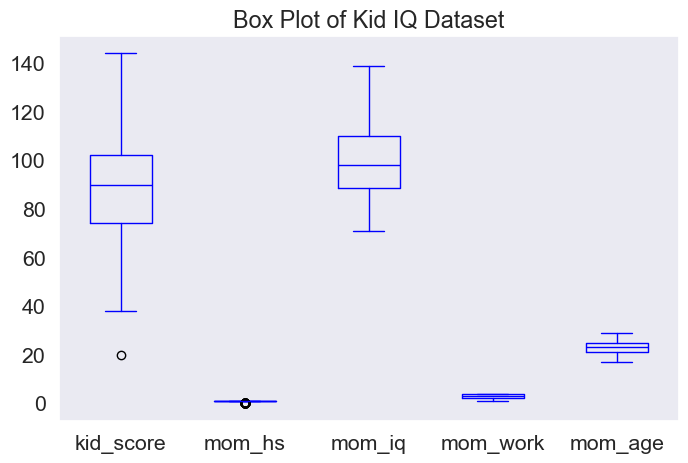

In [146]:
# checking for outliers in the kid iq dataset
plt.figure(figsize=(8, 5))
box = df1.boxplot(color='blue')  # single color for all boxes and whiskers
plt.grid(False)                  # turn off grid lines
plt.title("Box Plot of Kid IQ Dataset")
plt.show()

In [147]:
# number of outliers in the 'kind_score' column
len(df1[df1['kid_score'] < 25])

1

In [148]:
# identifying the outlier record
df1[df1['kid_score'] < 25]

,kid_score,mom_hs,mom_iq,mom_work,mom_age
285,20,0,83.533119,2,23


In [149]:
# unique values in the mom_hs column
df1['mom_hs'].unique()

array([1, 0])

In [150]:
# number of unique values in the mom_hs column
df1['mom_hs'].nunique()

2

There is just one outlier in the kid_score column, though this may not have significant impact on the analysis, However it will be dropped. Also in the mom_hs column there are two unique values here '0' and '1', apprently there are no outlier in this column. So only the outlier in kid_score will be dropped.

In [151]:
# dropping the outlier in kid_score column
df1.drop(index=285, inplace=True)

In [152]:
# overview of the kid iq dataset
create_dataset_summary(df1)

,Count,Nulls,Cardinality,Data type,Duplicates,Min value,Max value
kid_score,432,0,84,int64,0,38.00,144.00
mom_hs,432,0,2,int64,0,0.00,1.00
mom_iq,432,0,331,float64,0,71.04,138.89
mom_work,432,0,4,int64,0,1.00,4.00
mom_age,432,0,13,int64,0,17.00,29.00


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:20px; color:white; text-align:center">2.2 Cleaning Child IQ Dataset (df2) </p>
</div>

For df2:
 - 'Unnamed: 0' column will be dropped
 -  duplicate records and outliers will be dropped
 -    'momage' will be renamed to 'mom_age'.

## Dropping 'Unnamed: 0' column

In [153]:
# dropping the 'Unnamed: 0' column
df2 = df2.drop(columns=('Unnamed: 0'))

## Checking for and removing duplicate records

In [154]:
# checking for duplicate
df2.duplicated().sum()

np.int64(50)

In [155]:
# dropping duplicates
df2 = df2.drop_duplicates()

## Identifying and handling outliers

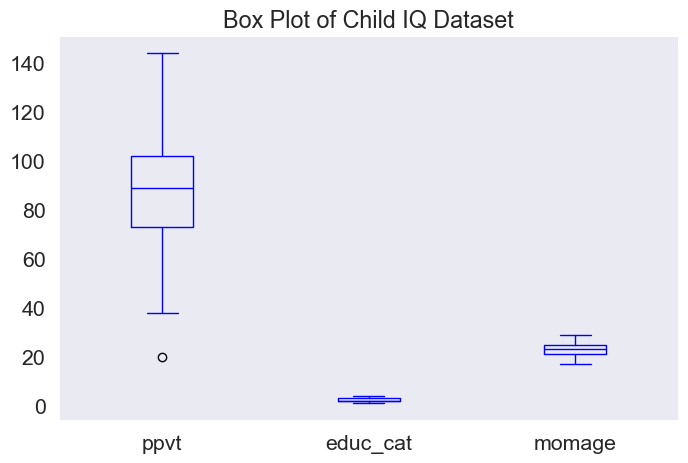

In [156]:
# checking for outliers in the child iq dataset
plt.figure(figsize=(8, 5))
box = df2.boxplot(color='blue')  # single color for all boxes and whiskers
plt.grid(False)                  # turn off grid lines
plt.title("Box Plot of Child IQ Dataset")
plt.show()

In [157]:
# number of outliers in the 'ppvt' column
len(df2[df2['ppvt'] < 25])

1

In [158]:
# identifying the outlier
df2[df2['ppvt'] < 25]

,ppvt,educ_cat,momage
354,20,1,23


In [159]:
# dropping the outlier in child dataset
df2.drop(index=354, inplace=True)

## Renaming the column 'momage' to 'mom_age' in df2

In [160]:
# Rename the column momage to mom_age
df2 = df2.rename(columns={'momage': 'mom_age'})

## Merging the datasets

In [161]:
# join both dataset on the age of the mother
merged_df = pd.merge(df1, df2, on='mom_age', how='inner')

Merging the datasets using the non-unique column (mom_age) resulted in a many-to-many relationship, which introduced illogical records. For instance, there were cases where mothers who did not attend high school were categorised as high school graduate or higher, and also mothers who had completed high school were recorded under the category ‘less than high school’. These were identified and dropped in the code below.

In [162]:
# mothers who did not attend high school were categorised as high school graduate or higher in edu_cat
merged_df.loc[(merged_df['mom_hs'] == 0) & (merged_df['educ_cat'] > 1)].head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,ppvt,educ_cat
123,98,0,107.901838,1,18,64,2
128,98,0,107.901838,1,18,47,2
419,102,0,100.534072,2,24,68,2
420,102,0,100.534072,2,24,94,3
421,102,0,100.534072,2,24,117,2


Illogical record where mother's who did not attend high school in df1 are categorized as high school graduate in df2

In [163]:
# mothers who had completed high school were recorded under the edu_cat ‘less than high school
merged_df.loc[(merged_df['mom_hs'] == 1) & (merged_df['educ_cat'] == 1)].head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,ppvt,educ_cat
5,65,1,121.117529,4,27,103,1
25,98,1,89.361882,4,25,95,1
26,98,1,89.361882,4,25,43,1
28,98,1,89.361882,4,25,73,1
29,98,1,89.361882,4,25,46,1


Illogical record where mother's who attended high school in df1 are categorized as less than high school in df2

In [164]:
# Total number of illogical records for two specific conditions
count1 = ((merged_df['mom_hs'] == 0) & (merged_df['educ_cat'] > 1)).sum()
count2 = ((merged_df['mom_hs'] == 1) & (merged_df['educ_cat'] == 1)).sum()
count1 + count2

np.int64(4750)

In [165]:
# function to drop the identified illogical records
def filter_mom_education(df):
    """
    Removes rows where:
    1. mom_hs == 0 and educ_cat > 1
    2. mom_hs == 1 and educ_cat == 1

    Parameters:
        df (pd.DataFrame): Input DataFrame with 'mom_hs' and 'educ_cat' columns

    Returns:
        pd.DataFrame: Filtered DataFrame
    """
    condition_1 = (df['mom_hs'] == 0) & (df['educ_cat'] > 1)
    condition_2 = (df['mom_hs'] == 1) & (df['educ_cat'] == 1)
    
    filtered_df = df[~(condition_1 | condition_2)].copy()
    return filtered_df


In [166]:
# passing the merger df to the function to clean up the illogical records
merged_clean_df = filter_mom_education(merged_df)

In [167]:
# overview of the merged dataset
create_dataset_summary(merged_clean_df)

,Count,Nulls,Cardinality,Data type,Duplicates,Min value,Max value
kid_score,10349,0,84,int64,0,38.00,144.00
mom_hs,10349,0,2,int64,0,0.00,1.00
mom_iq,10349,0,331,float64,0,71.04,138.89
mom_work,10349,0,4,int64,0,1.00,4.00
mom_age,10349,0,13,int64,0,17.00,29.00
ppvt,10349,0,83,int64,0,38.00,144.00
educ_cat,10349,0,4,int64,0,1.00,4.00


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">3. Exploratory Data Analysis</p>
</div>

Discrete Variables: ['mom_hs', 'mom_work', 'mom_age', 'educ_cat']
Continuous Variables: ['kid_score', 'mom_iq', 'ppvt']


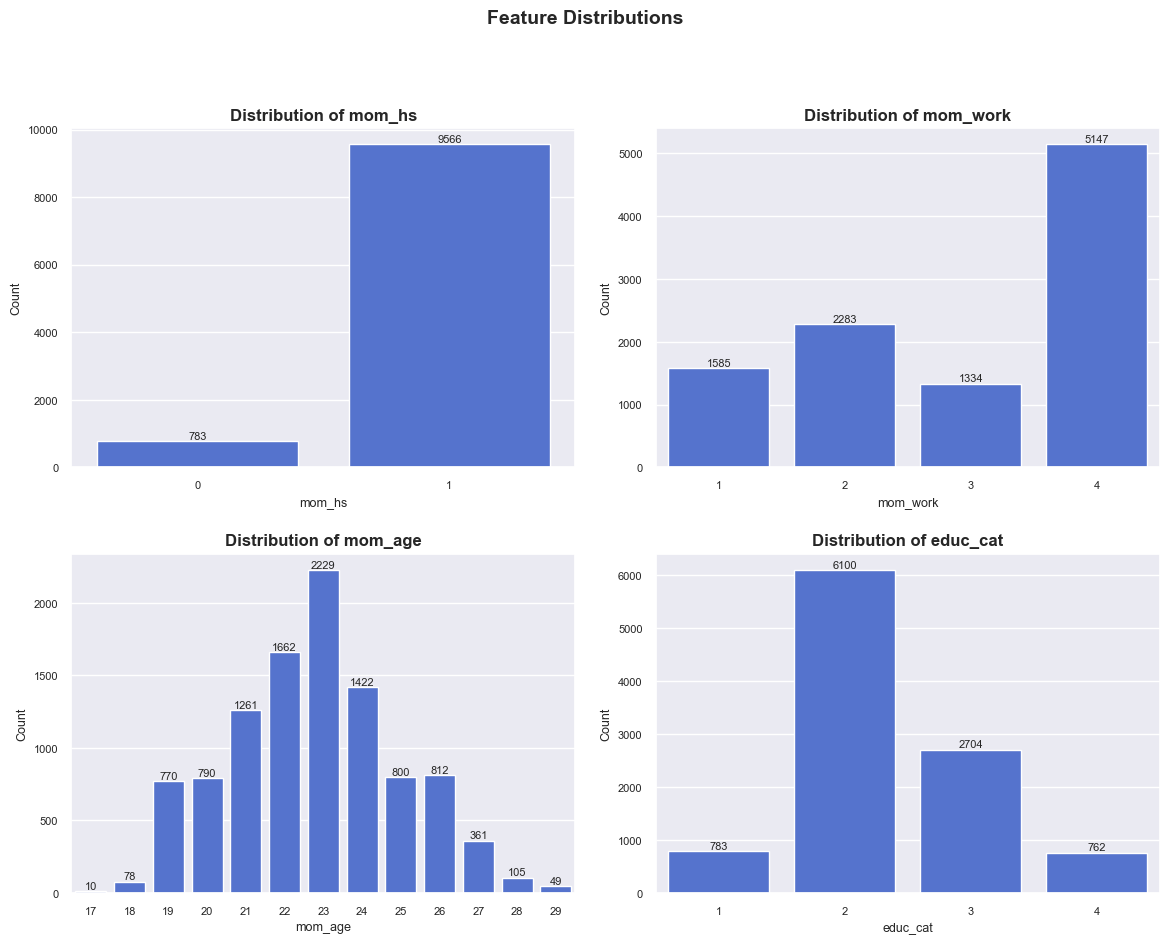

In [168]:
# Plotting the distribution of the columns

# Initialize lists for variable types
discrete_vars = []
continuous_vars = []

# Define a single color
plot_color = '#4169E1'

# Identify discrete and continuous features
for column in merged_clean_df.columns:
    unique_values = merged_clean_df[column].nunique()
    total_values = merged_clean_df.shape[0]

    if unique_values / total_values < 0.005 or unique_values < 5:
        discrete_vars.append(column)
    else:
        continuous_vars.append(column)

print("Discrete Variables:", discrete_vars)
print("Continuous Variables:", continuous_vars)

# Plot discrete variables in 4 subplots
num_plots = len(discrete_vars)
cols = 2
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(discrete_vars[:4]):  # Limit to 4 plots
    ax = axes[i]
    barplot = sns.countplot(x=var, data=merged_clean_df, color=plot_color, ax=ax)

    # Bold titles
    ax.set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')

    # Smaller axis labels
    ax.set_xlabel(var, fontsize=9)
    ax.set_ylabel('Count', fontsize=9)

    # Smaller tick labels
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Add data labels
    for p in barplot.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=8)

# Hide any unused subplots
for j in range(i + 1, 4):
    fig.delaxes(axes[j])

plt.suptitle("Feature Distributions", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("EDA.png")
plt.show()


As shown in the plot majority of mothers completed high school with over 12,000 entries, significantly outnumbering those who did not. The mom_work has 4 categories 4 has the most occurrence (with over 7,000) in the category. The mom_age reveals a roughly normal distribution centred around ages 21–24, with a sharp peak at age 23, indicating that most mothers (approximately 70%) were in their early twenties. Finally, educ_cat shows that education category 2 (HS grad, 7617) is the most prevalent, followed by categories 1 (Not HS grads, 3287) and 3 college grads, 3305) with similar counts, and category 4 (University grads, 890) being the least frequent

Continuous Variables: ['kid_score', 'mom_iq', 'ppvt']


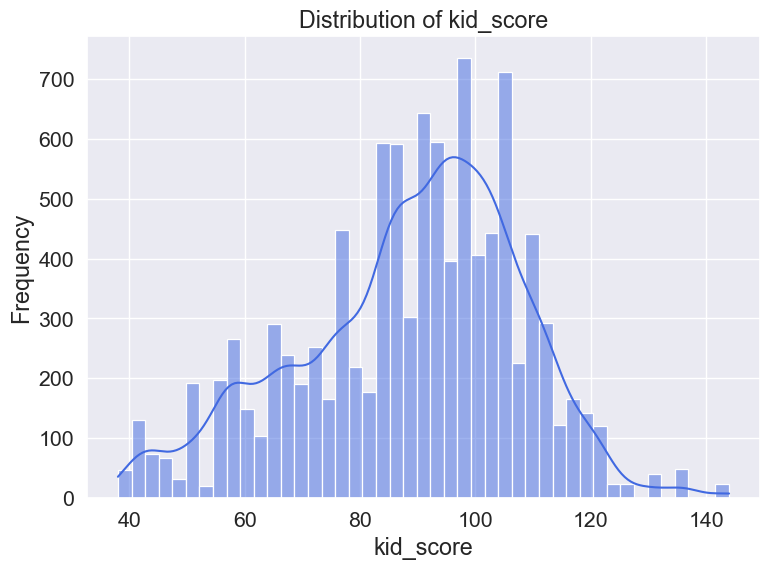

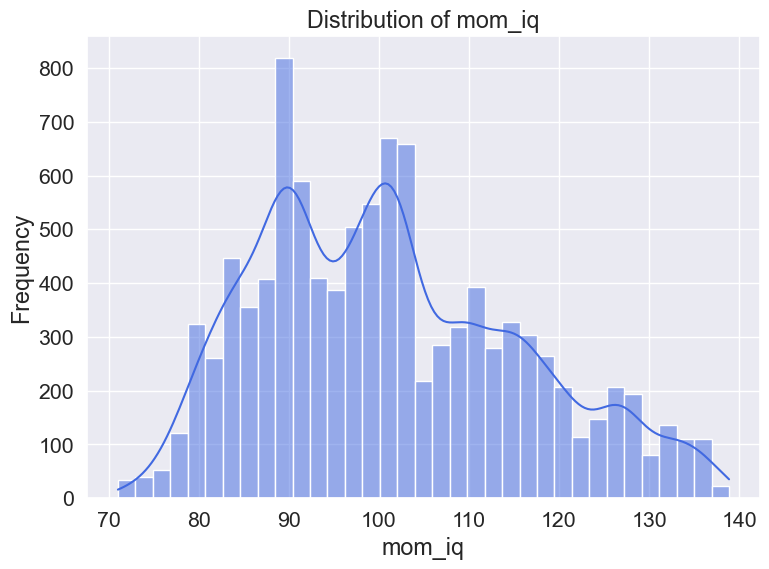

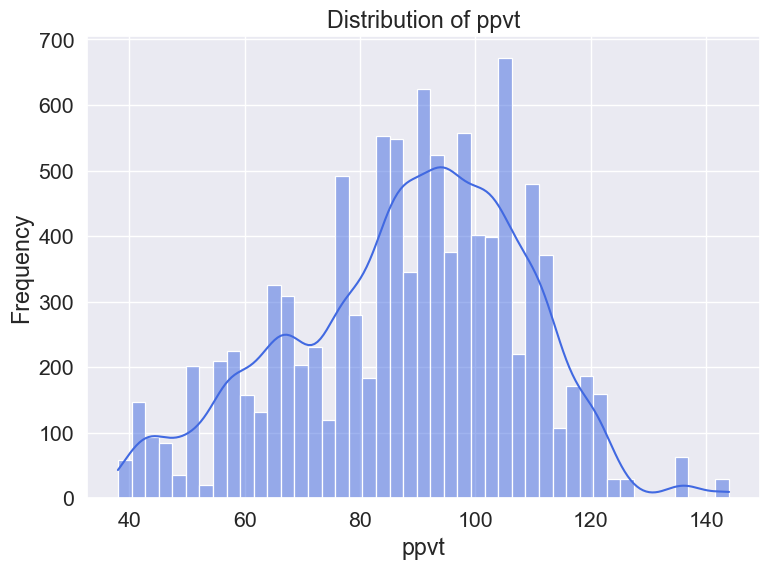

In [169]:
# Initialize lists to hold discrete and continuous variable names
#discrete_vars = []
continuous_vars = []

# Loop through all columns to classify as discrete or continuous
for column in merged_clean_df.columns:
    unique_values = merged_clean_df[column].nunique()
    total_values = merged_clean_df.shape[0]

    # Heuristic: if unique values < 10 or less than 5% of total rows, treat as discrete
    if unique_values / total_values < 0.005 or unique_values < 5:
        discrete_vars.append(column)
    else:
        continuous_vars.append(column)

# Display the identified variable types
#print("Discrete Variables:", discrete_vars)
print("Continuous Variables:", continuous_vars)


# Plot histogram + KDE for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(merged_clean_df[var], kde=True, color=plot_color)  # Single color
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


Both kid_score and ppvt distributions exhibit a generally unimodal, somewhat bell-shaped pattern, indicating that the majority of scores for children's overall performance and receptive vocabulary cluster around a single central average, gradually tapering off towards the extremes. In contrast, the mom_iq distribution is bimodal,

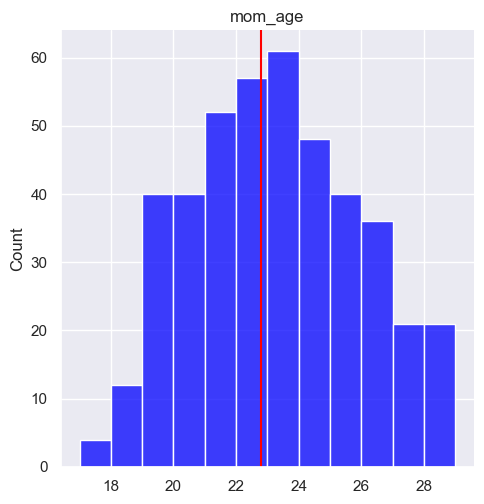

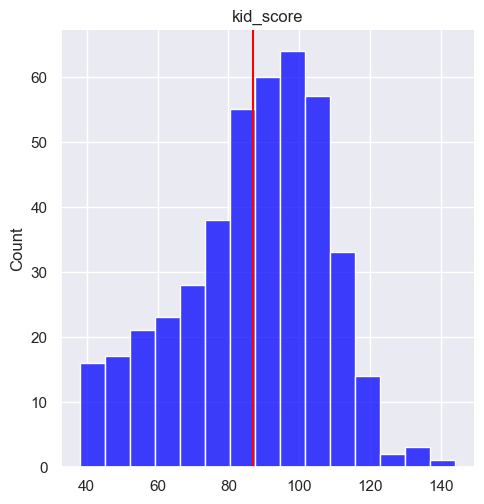

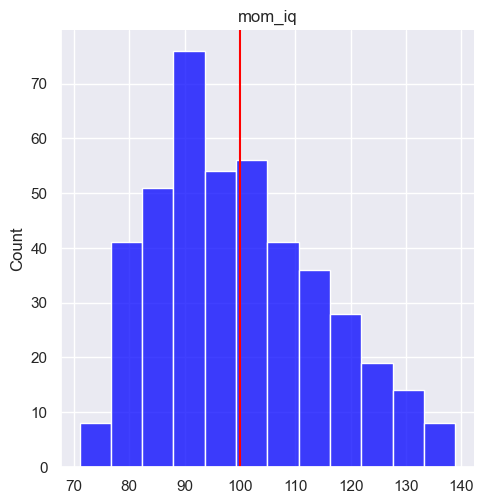

In [170]:
# Investigating the distribution of all fields, adding the mean

n_variables = ['mom_age', 'kid_score', 'mom_iq']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for n in n_variables:
    x = df1[n].values
    sns.displot(x, color = 'blue');

    # Calculating the mean
    mean = df1[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

The mom_age distribution is centered at approximately 22-23 and appears relatively symmetrical, with a min age of 17 and max of 29,suggesting that mothers in this dataset are predominantly young adults. The kid_score distribution, with a mean around 88-90, exhibits a shape close to a normal distribution, indicating that most children's scores cluster around this average. In contrast, the mom_iq distribution, while centered at a mean of 100, shows a slight left-skew, implying a higher concentration of mothers with IQs above the average, with a tail extending towards lower IQ values

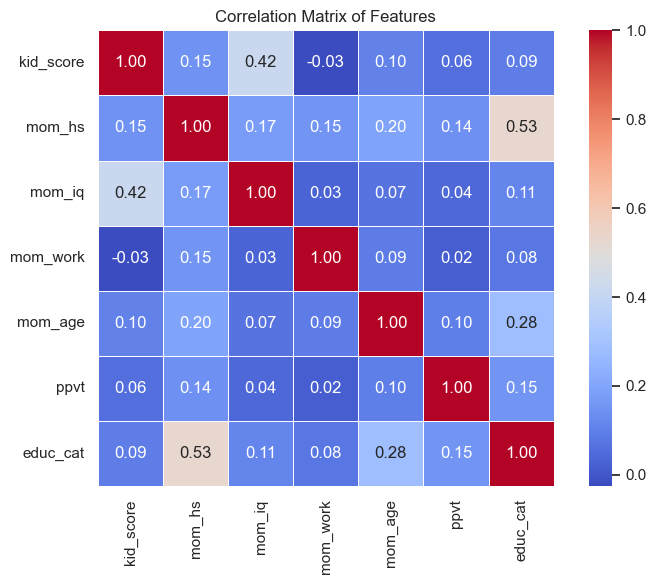

In [171]:
# Compute the correlation matrix (only numeric columns)
corr_matrix = merged_clean_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Title and layout
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.savefig("heat_map.png")
plt.show()

The strongest positive correlation observed is between kid_score and mom_iq (0.46), suggesting that mother's IQ is the most influential factor (among those presented) on kid_score. 

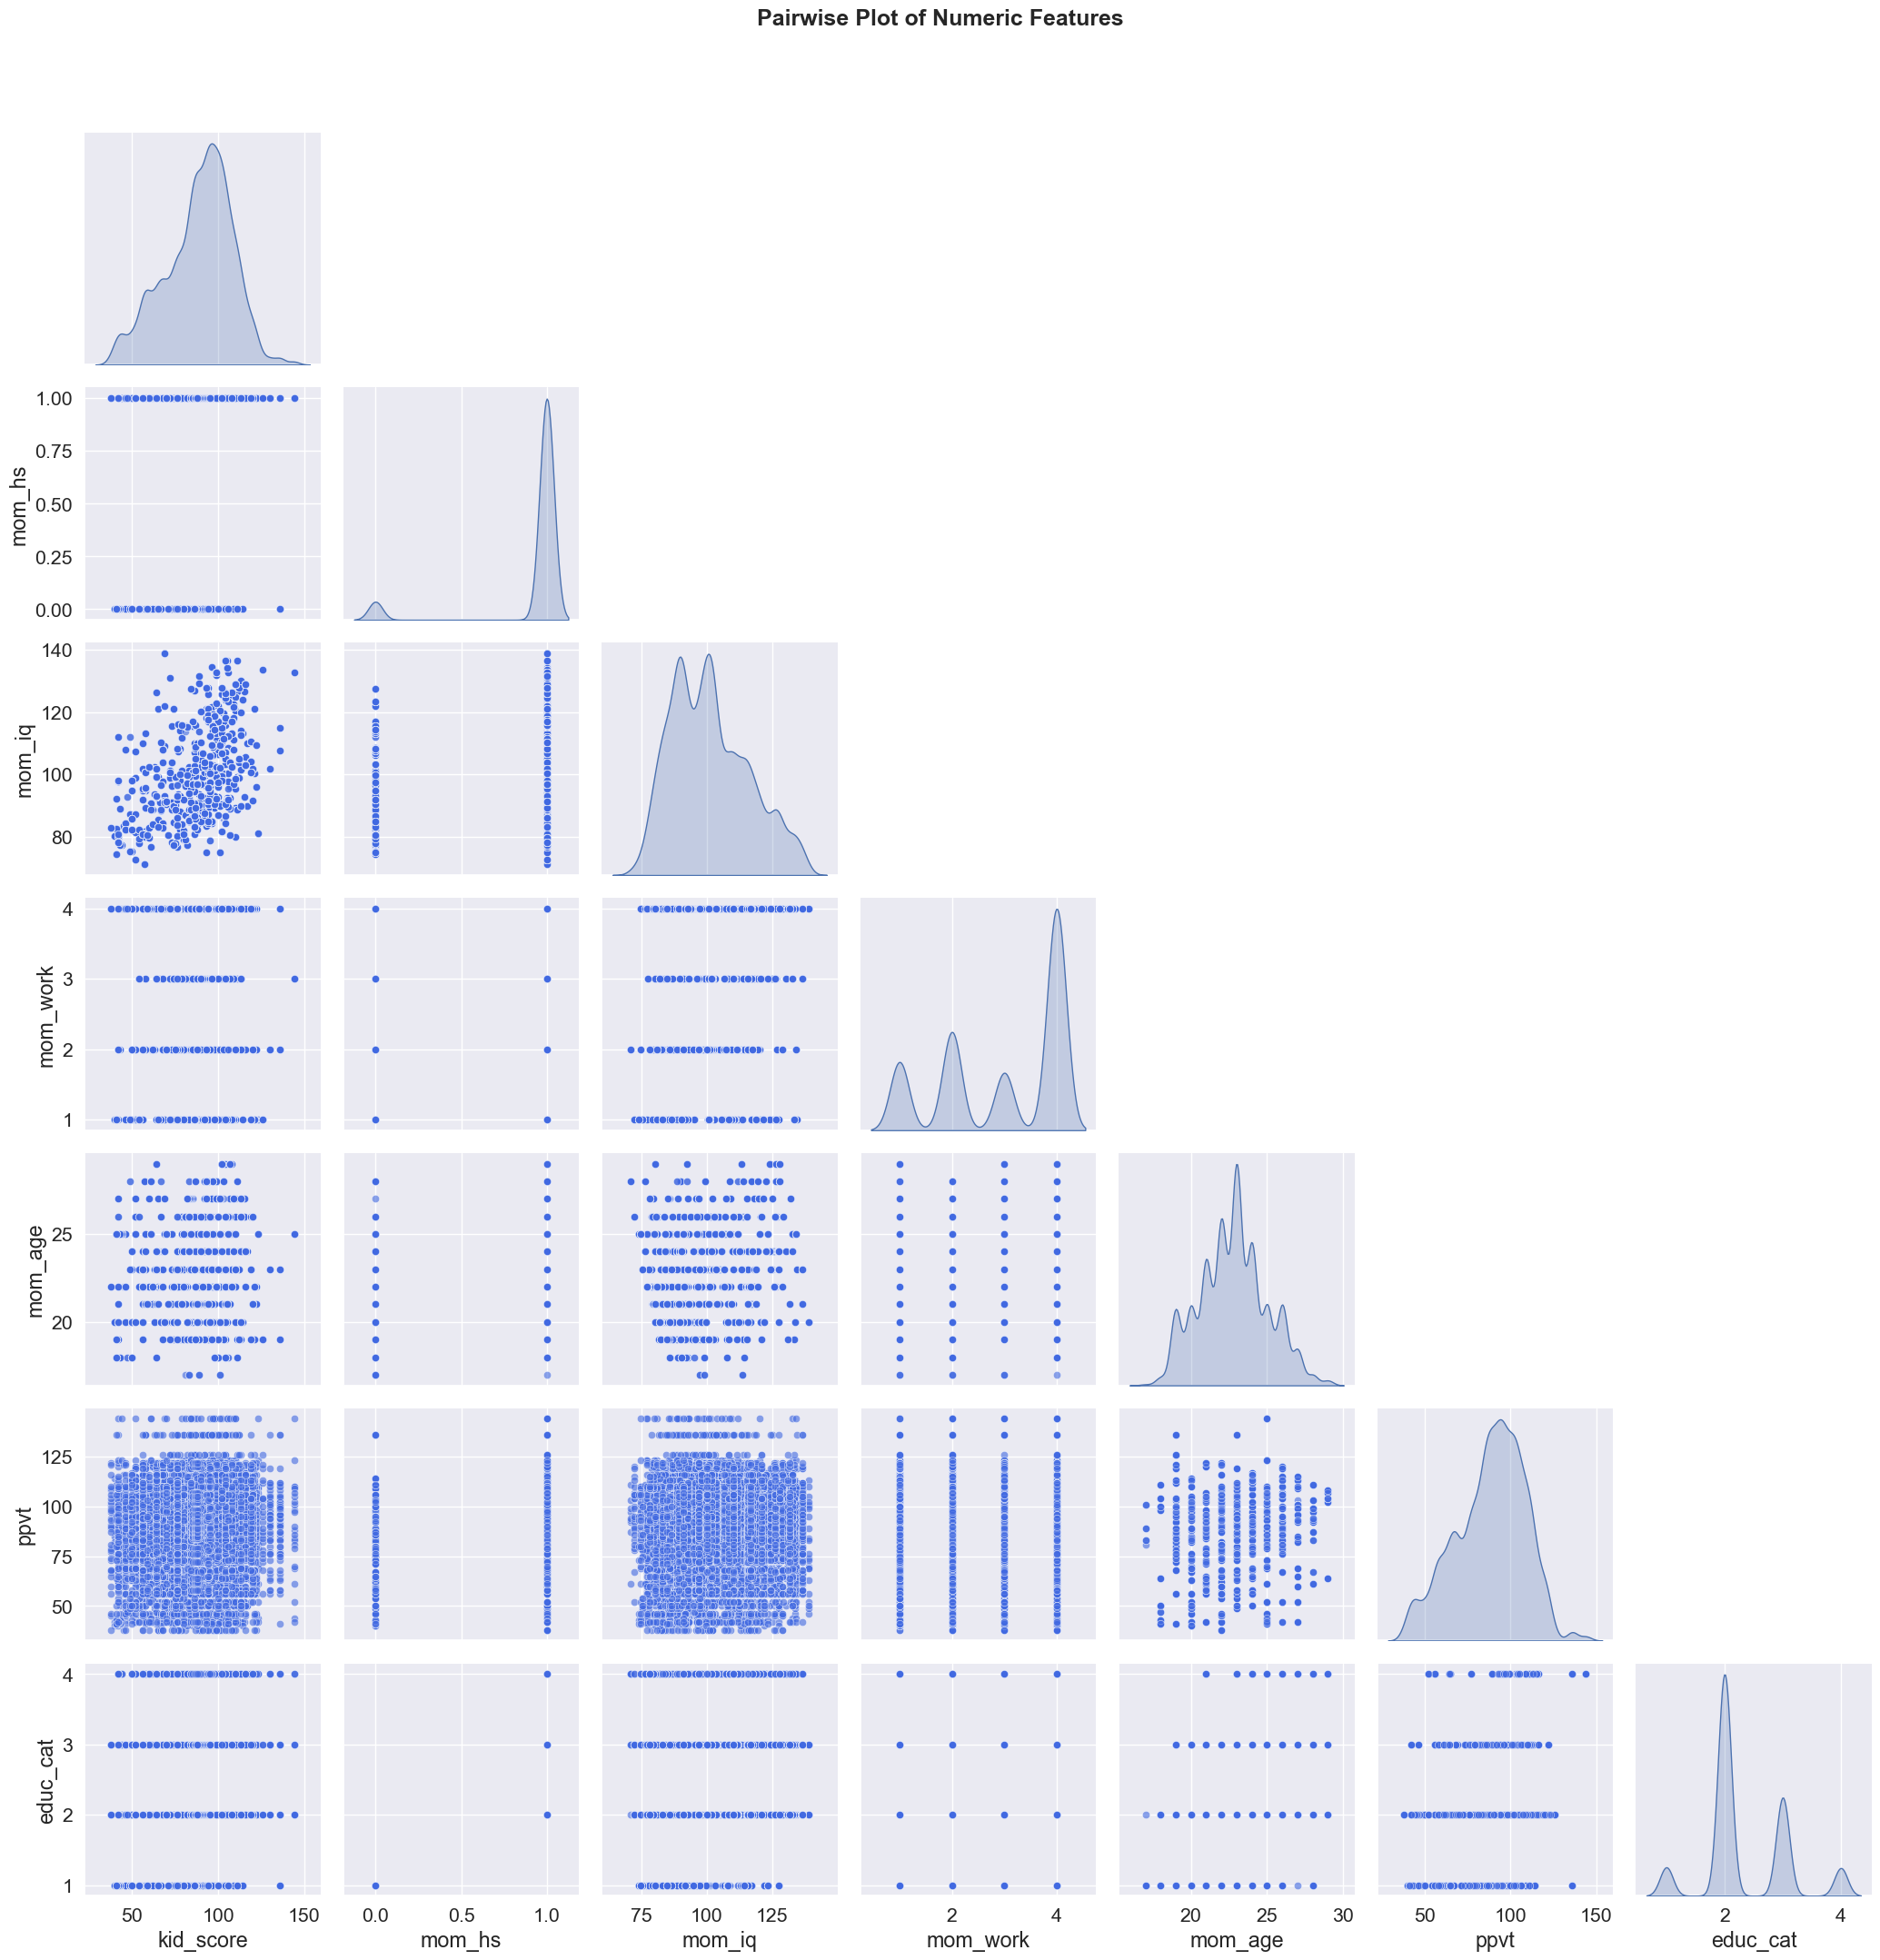

In [172]:
# Set larger font scale for better readability
sns.set_context("notebook", font_scale=1.4)

# Create a pairwise scatter plot matrix with larger figure size
pair_plot = sns.pairplot(
    merged_clean_df,
    corner=True,
    diag_kind='kde',
    height=3,  # Increase individual subplot size
    plot_kws={'alpha': 0.6, 'color': '#4169E1'}
)

# Set a larger, bold title
pair_plot.fig.suptitle(
    "Pairwise Plot of Numeric Features", 
    y=1.03, 
    fontsize=18, 
    fontweight='bold'
)

plt.tight_layout()
plt.savefig("pair_wise.png")
plt.show()

The most notably positive relationship is between kid_score and mom_iq, indicating that higher maternal IQ tends to correspond with higher kid scores. Also, ppvt scores generally increase with educ_cat, suggesting an association between education level and vocabulary. 

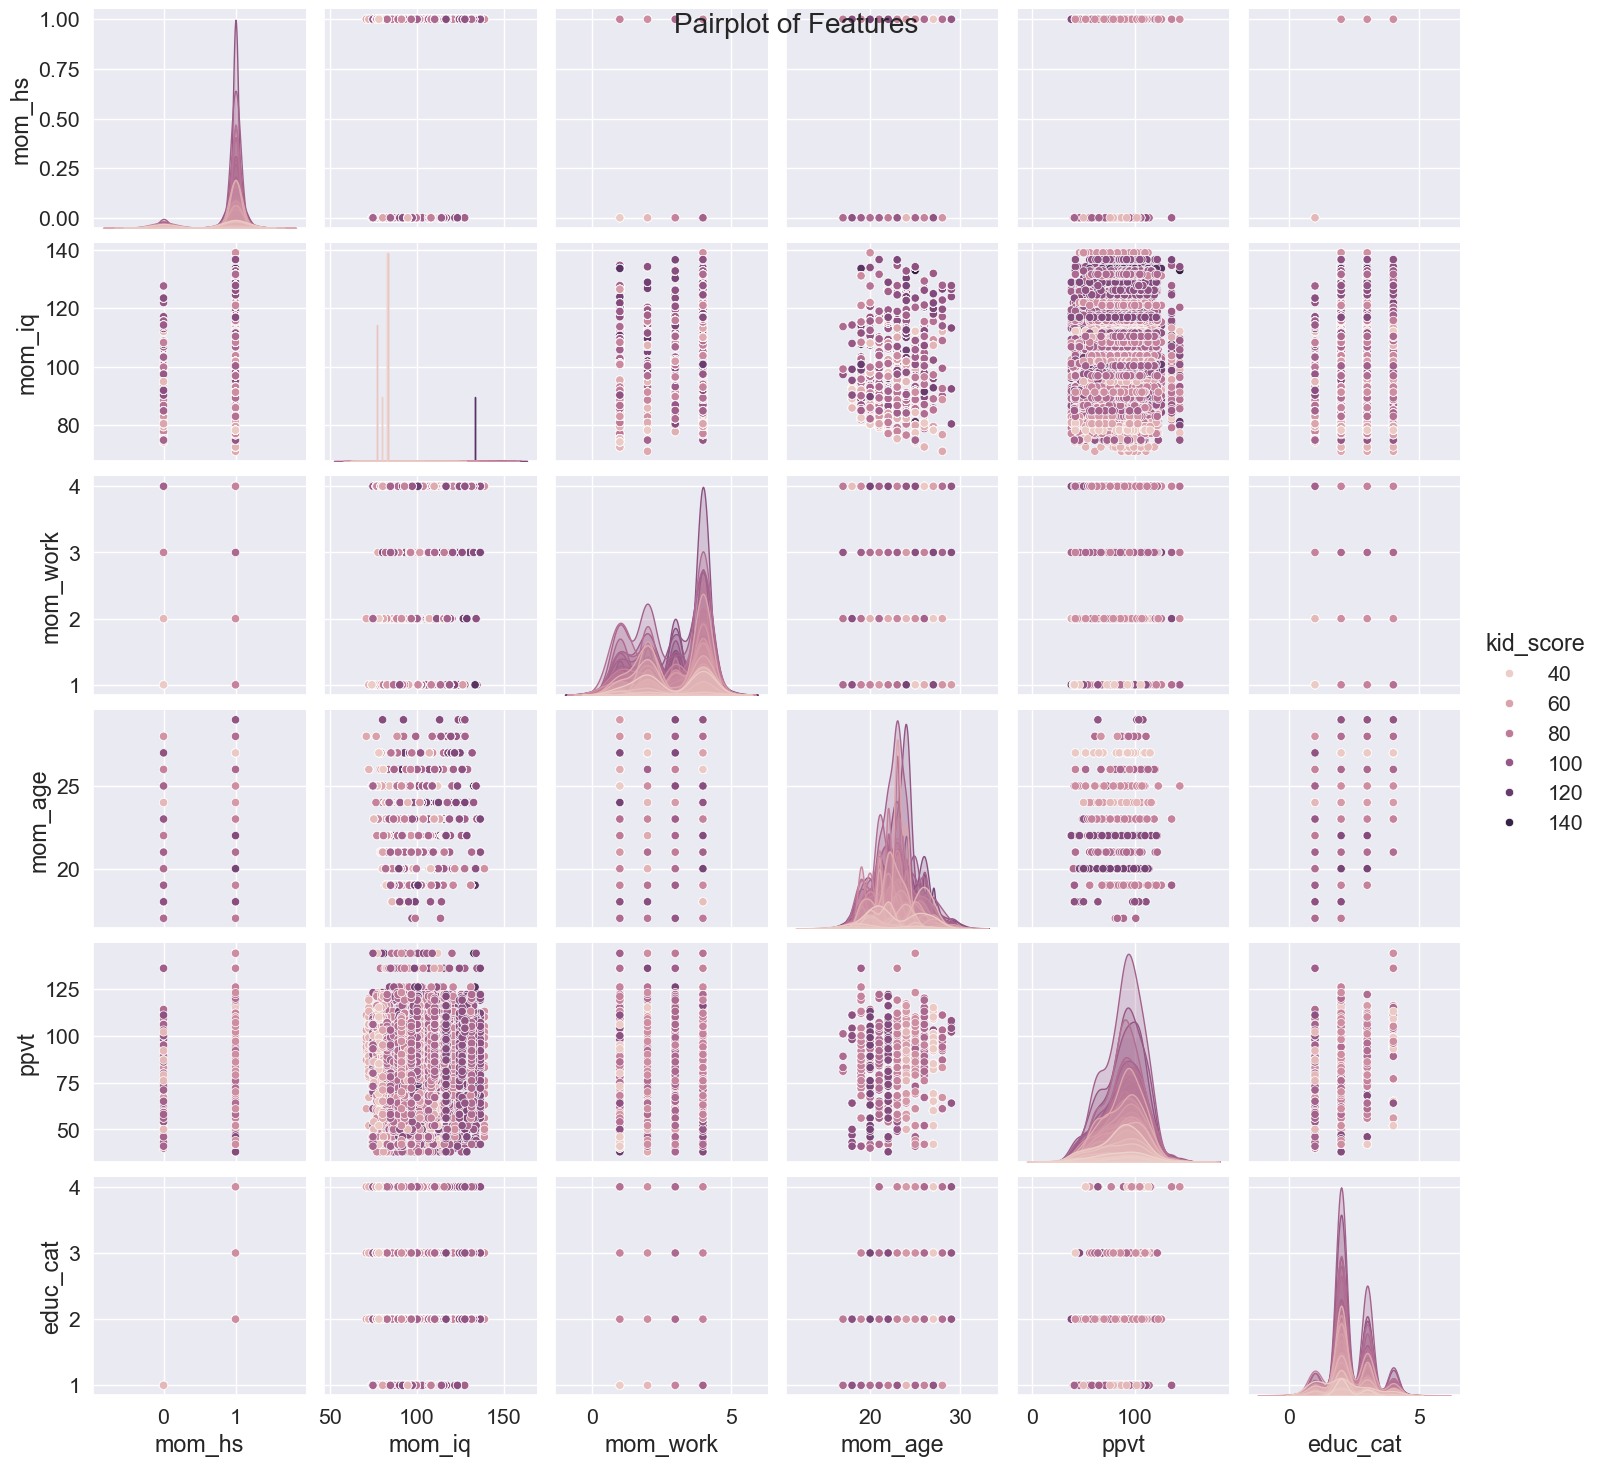

In [173]:
# Pairplot to visualize relationships with kid score
sns.pairplot(merged_clean_df, hue='kid_score')
#plt.title('Pairplot of Features')
plt.suptitle('Pairplot of Features')
plt.savefig("pair_plot.png")
plt.show()

This pair plot, illustrates how kid_score interacts with all other variables. Darker hue colour are observed with higher mom_iq and mom_age

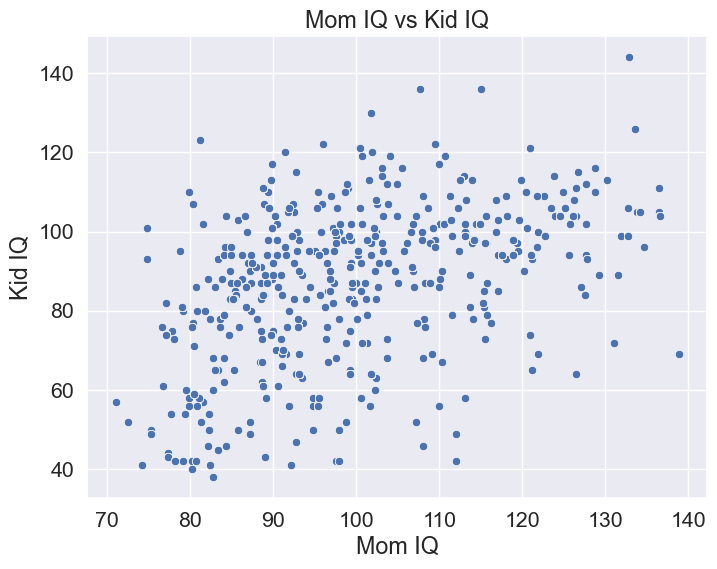

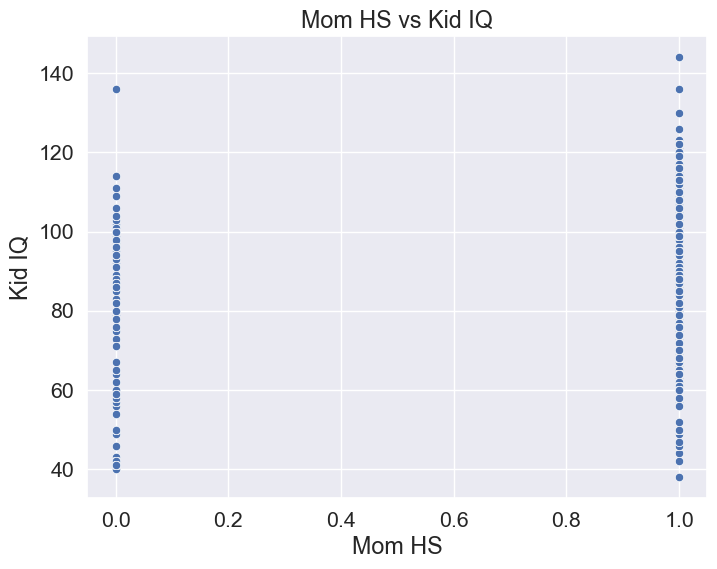

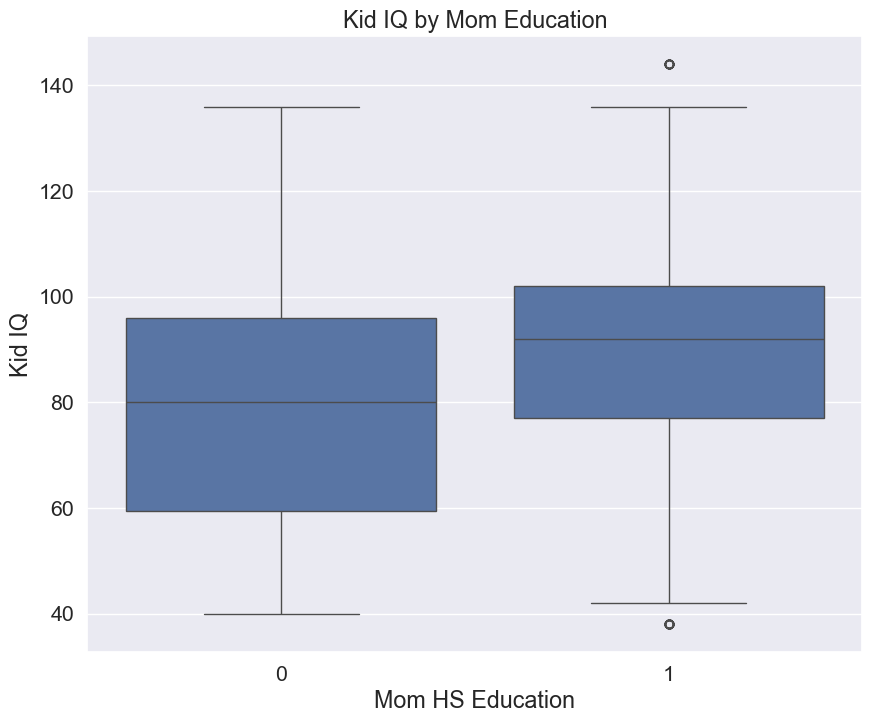

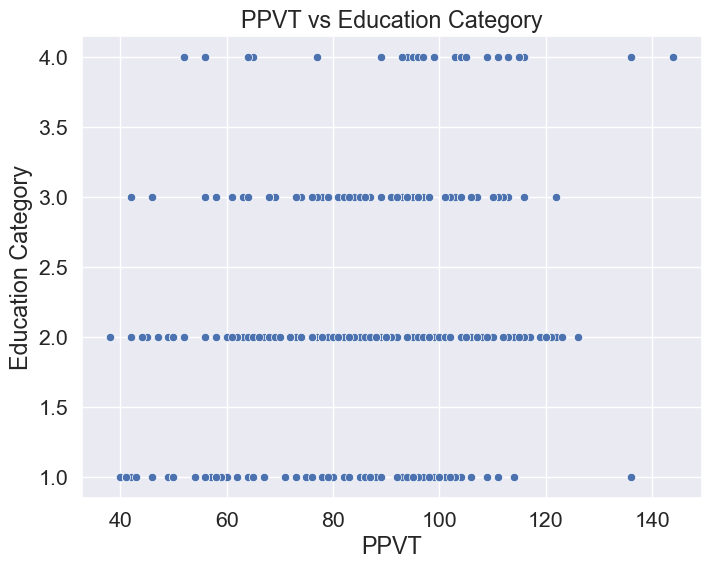

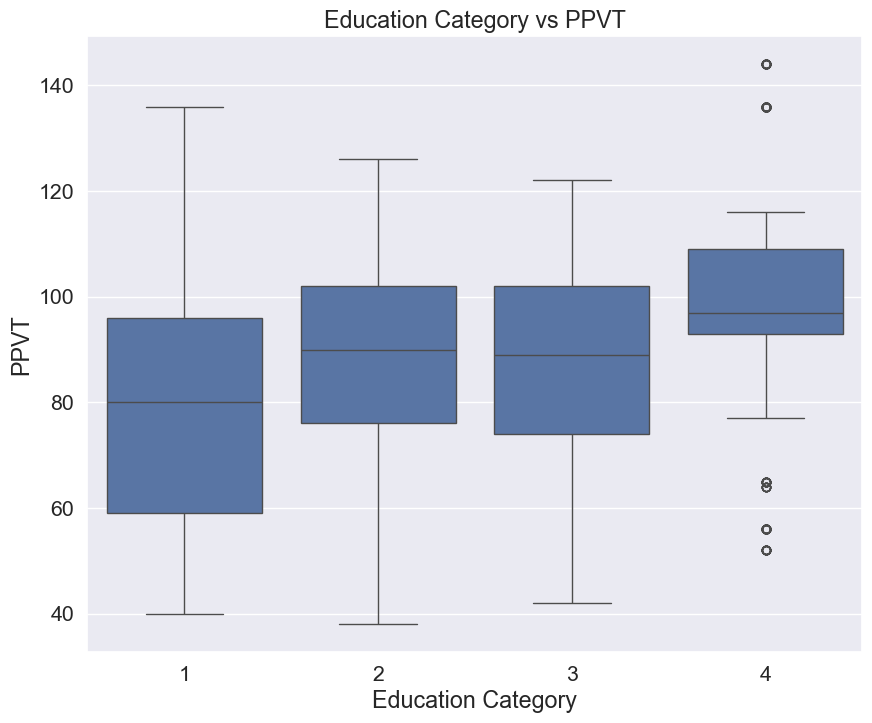

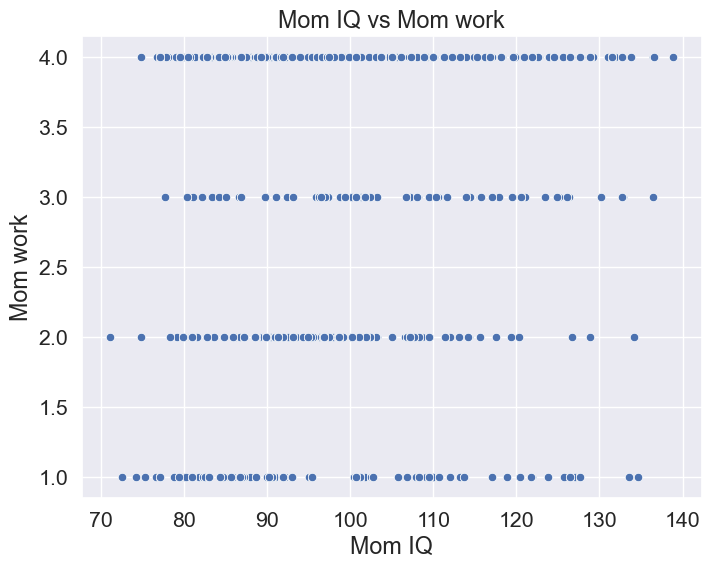

In [174]:
# scatter plot of mom_iq and kid_score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mom_iq', y='kid_score', data=merged_clean_df)
plt.title('Mom IQ vs Kid IQ')
plt.xlabel('Mom IQ')
plt.ylabel('Kid IQ')
plt.show()

# scatter plot of mom_hs and kid_score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mom_hs', y='kid_score', data=merged_clean_df)
plt.title('Mom HS vs Kid IQ')
plt.xlabel('Mom HS')
plt.ylabel('Kid IQ')
plt.show()

# box plot of mom_hs and kid_score
plt.figure(figsize=(10, 8))
sns.boxplot(x='mom_hs', y='kid_score', data=merged_clean_df)
plt.title('Kid IQ by Mom Education')
plt.xlabel('Mom HS Education')
plt.ylabel('Kid IQ')
plt.show()

# scatter plot of ppvt and educ_cat
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ppvt', y='educ_cat', data=merged_clean_df)
plt.title('PPVT vs Education Category')
plt.xlabel('PPVT')
plt.ylabel('Education Category')
plt.show()

# box plot of educ_cat and ppvt
plt.figure(figsize=(10, 8))
sns.boxplot(x='educ_cat', y='ppvt', data=merged_clean_df)
plt.title('Education Category vs PPVT')
plt.xlabel('Education Category')
plt.ylabel('PPVT')
plt.show()

# scatter plot of mom_iq and kid_score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mom_iq', y='mom_work', data=merged_clean_df)
plt.title('Mom IQ vs Mom work')
plt.xlabel('Mom IQ')
plt.ylabel('Mom work')
plt.show()

The scatter plot shows a positive correlation between the mom iq and kid iq. The kid iq and mom hs box plot suggests a positive association between a mother's high school education status and her child's IQ, with children of mothers who completed high school tending to have higher IQ scores on average. Also there is a positve correlation between the education cetgory and ppvt, as the Education Category increases from 1 to 4 representing increasing levels of education, the median PPVT score consistently rises. There isn't an obvious strong linear relationship between mom's IQ and the defined work categories from this visualization

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">4. Feature Engineering</p>
</div>

One new features was created from the merged datasets and it is 'mom_age_group'

In [175]:
# creating mom_age_group column in df1
df1['mom_age_group'] = pd.cut(df1['mom_age'], bins=[0, 20, 30], labels=['Teenager', 'Twenties'], right=False)

In [176]:
# creating mom_age_group column in the merged dataset
merged_clean_df['mom_age_group'] = pd.cut(merged_clean_df['mom_age'], bins=[0, 20, 30], labels=['Teenager', 'Twenties'], right=False)

Mum ages between 0 and 19 are represented as teenagers while those between 20 and 29 are represented as twenties

In [177]:
# first few rows of the merged dataset
merged_clean_df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,ppvt,educ_cat,mom_age_group
0,65,1,121.117529,4,27,84,2,Twenties
1,65,1,121.117529,4,27,101,3,Twenties
2,65,1,121.117529,4,27,109,4,Twenties
3,65,1,121.117529,4,27,82,3,Twenties
4,65,1,121.117529,4,27,113,4,Twenties


In [178]:
# dataset information
merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10349 entries, 0 to 15097
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   kid_score      10349 non-null  int64   
 1   mom_hs         10349 non-null  int64   
 2   mom_iq         10349 non-null  float64 
 3   mom_work       10349 non-null  int64   
 4   mom_age        10349 non-null  int64   
 5   ppvt           10349 non-null  int64   
 6   educ_cat       10349 non-null  int64   
 7   mom_age_group  10349 non-null  category
dtypes: category(1), float64(1), int64(6)
memory usage: 657.0 KB


In [179]:
# checking for duplicates
merged_clean_df.duplicated().sum()

np.int64(0)

In [180]:
# checking for null values
merged_clean_df.isnull().sum()

kid_score        0
mom_hs           0
mom_iq           0
mom_work         0
mom_age          0
ppvt             0
educ_cat         0
mom_age_group    0
dtype: int64

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">5. Data Preprocessing</p>
</div>

## df1 Data preprocessing

In [181]:
# Define features & target for df1
#X_df1 = df1.drop(['kid_score', 'mom_age'], axis=1)
X_df1 = df1.drop(['kid_score', 'mom_age'], axis=1)
y_df1 = df1['kid_score']

# Identify column types
numeric_features_df1 = X_df1.select_dtypes(include=['int64', 'float64']).columns.tolist()  # ['mom_hs', 'mom_iq', 'mom_work']
categorical_features_df1 = X_df1.select_dtypes(include=['category']).columns.tolist()  # ['mom_age_group']

# Verify columns to ensure 'ppvt' is not included
print("X_df1 columns:", X_df1.columns.tolist())
print("Numeric features:", numeric_features_df1)
print("Categorical features:", categorical_features_df1)

# Train/Test Split
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)

# Preprocessing for df1
preprocessor_df1 = ColumnTransformer([
    ('num', RobustScaler(), numeric_features_df1),  # Scale numeric features
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features_df1)  # Encode categorical features
])

# Fit the preprocessor on the training data
preprocessor_df1.fit(X_train_df1)  # Use preprocessor_df1, not preprocessor

# Transform the training data
X_train_transformed_df1 = preprocessor_df1.transform(X_train_df1)  # Use preprocessor_df1

# Convert transformed data to DataFrame
# Get transformed feature names
num_features_df1 = preprocessor_df1.named_transformers_['num'].get_feature_names_out(numeric_features_df1)
if categorical_features_df1:  # Only if there are categorical columns
    cat_features_df1 = preprocessor_df1.named_transformers_['cat'].get_feature_names_out(categorical_features_df1)
else:
    cat_features_df1 = []

# Combine both
all_features_df1 = np.concatenate([num_features_df1, cat_features_df1])

# Convert to DataFrame
X_train_scaled_df1 = pd.DataFrame(
    X_train_transformed_df1.toarray() if hasattr(X_train_transformed_df1, 'toarray') else X_train_transformed_df1,
    columns=all_features_df1,
    index=X_train_df1.index
)

# View first few rows
print("df1 dataset transformed features:\n", X_train_scaled_df1.head())

X_df1 columns: ['mom_hs', 'mom_iq', 'mom_work', 'mom_age_group']
Numeric features: ['mom_hs', 'mom_iq', 'mom_work']
Categorical features: ['mom_age_group']
df1 dataset transformed features:
      mom_hs    mom_iq  mom_work  mom_age_group_Twenties
132     0.0  1.319945      -1.0                     1.0
231     0.0 -0.573490      -0.5                     1.0
31      0.0  0.123191      -0.5                     1.0
84      0.0 -0.426125      -0.5                     1.0
297    -1.0 -1.008037       0.5                     1.0


## Merged Dataset Preprocessing

In [182]:
# Define features & target for merged dataset
X_merged = merged_clean_df.drop(['kid_score', 'mom_age'], axis=1)
y_merged = merged_clean_df['kid_score']

# Identify column types
numeric_features_merged = X_merged.select_dtypes(include=['int64', 'float64']).columns.tolist()  # e.g., ['mom_hs', 'mom_iq', 'mom_work', 'ppvt', 'educ_cat']
categorical_features_merged = X_merged.select_dtypes(include=['category']).columns.tolist()  # e.g., ['mom_age_group']

# Verify columns in X_merged
print("X_merged columns:", X_merged.columns.tolist())

# Train/Test Split
X_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(
    X_merged, y_merged, test_size=0.2, random_state=42
)

# Preprocessing for merged
preprocessor_merged = ColumnTransformer([
    ('num', RobustScaler(), numeric_features_merged),  # Scale numeric features
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features_merged)  # Encode categorical features
])

# Fit the preprocessor on the training data
preprocessor_merged.fit(X_train_merged)  # Use preprocessor_merged explicitly, consistent with df1

# Transform the training data
X_train_transformed_merged = preprocessor_merged.transform(X_train_merged)  # Use preprocessor_merged

# Convert transformed data to DataFrame
# Get transformed feature names
num_features_merged = preprocessor_merged.named_transformers_['num'].get_feature_names_out(numeric_features_merged)
cat_features_merged = preprocessor_merged.named_transformers_['cat'].get_feature_names_out(categorical_features_merged) if categorical_features_merged else []
all_features_merged = np.concatenate([num_features_merged, cat_features_merged])

# Convert to DataFrame
X_train_scaled_merged = pd.DataFrame(
    X_train_transformed_merged.toarray() if hasattr(X_train_transformed_merged, 'toarray') else X_train_transformed_merged,
    columns=all_features_merged,
    index=X_train_merged.index
)

# View first few rows
print("Merged dataset transformed features:\n", X_train_scaled_merged.head())


X_merged columns: ['mom_hs', 'mom_iq', 'mom_work', 'ppvt', 'educ_cat', 'mom_age_group']
Merged dataset transformed features:
        mom_hs    mom_iq  mom_work      ppvt  educ_cat  mom_age_group_Twenties
12886     0.0 -0.494366       0.5  0.653846       0.0                     1.0
7946      0.0 -0.682878      -1.0  0.192308       0.0                     1.0
8499      0.0 -0.369676       0.5  1.153846       0.0                     1.0
11085     0.0 -0.678209      -0.5  0.884615       0.0                     1.0
13748     0.0 -0.384437       0.5  0.038462       0.0                     1.0


The Kid score which the target variable was dropped from the predictior and also mother age was dropped to avoid colinearity with mother age group. A pipeline was created to scale the numeric columns using robust scalar to address outliers and one hot encodeing to transforme the mother age group to numeric column that the machine learning model can process. The dataset was split with 80% of it used for training while the other 20% was used for testing. Then the training data was passed to the preprocessor using the fit function

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">6. Model Development</p>
</div>

## Linear model development for df1 

In [183]:
# Build Pipeline for df1
pipeline_df1 = Pipeline([
    ('preprocessing', preprocessor_df1),
    ('regressor', LinearRegression())  # Or GradientBoostingRegressor() for your best model
])


In [184]:
# Fit model
pipeline_df1.fit(X_train_df1, y_train_df1)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['mom_hs', 'mom_iq',
                                                   'mom_work']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['mom_age_group'])])),
                ('regressor', LinearRegression())])

## Prediction

In [185]:
# Predictions
#y_pred = pipeline.predict(X_test)
y_pred_df1 = pipeline_df1.predict(X_test_df1)


## Model Evaluation

In [186]:
# Compute metrics
df1_r2 = r2_score(y_test_df1, y_pred_df1)
df1_mae = mean_absolute_error(y_test_df1, y_pred_df1)
df1_rmse = np.sqrt(mean_squared_error(y_test_df1, y_pred_df1))


## Printing results

In [187]:

print(f"R²: {df1_r2:.3f}\nMAE: {df1_mae:.3f}\nRMSE: {df1_rmse:.3f}")

R²: 0.137
MAE: 14.834
RMSE: 18.010


## Linear model development for merged dataset

In [188]:
# Build Pipeline for merged
pipeline_merged = Pipeline([
    ('preprocessing', preprocessor_merged),
    ('regressor', LinearRegression())  # Or GradientBoostingRegressor() for your best model
])

In [189]:
# Fit model
pipeline_merged.fit(X_train_merged, y_train_merged)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['mom_hs', 'mom_iq',
                                                   'mom_work', 'ppvt',
                                                   'educ_cat']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['mom_age_group'])])),
                ('regressor', LinearRegression())])

In [190]:
# Evaluate on test set
y_pred_merged = pipeline_merged.predict(X_test_merged)

In [191]:
# Compute metrics
merged_r2 = r2_score(y_test_merged, y_pred_merged)
merged_mae = mean_absolute_error(y_test_merged, y_pred_merged)
merged_rmse = np.sqrt(mean_squared_error(y_test_merged, y_pred_merged))


In [192]:
print(f"R²: {merged_r2:.3f}\nMAE: {merged_mae:.3f}\nRMSE: {merged_rmse:.3f}")

R²: 0.215
MAE: 13.194
RMSE: 16.697


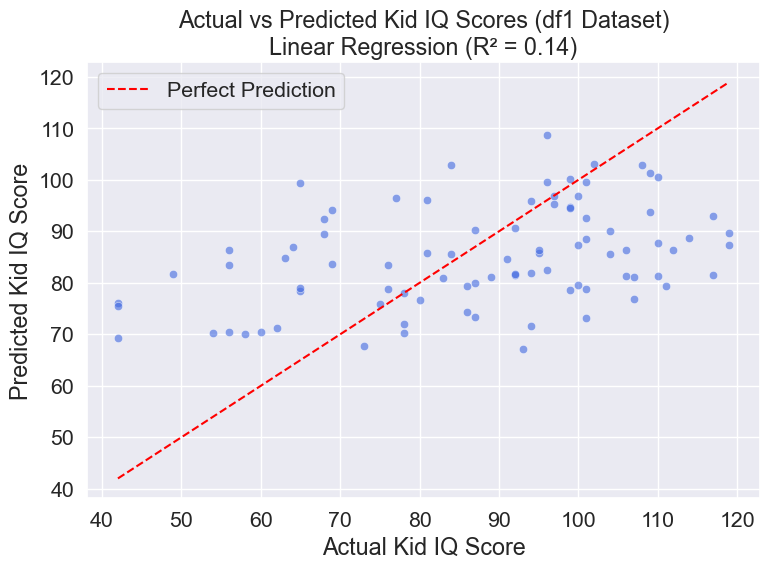

In [193]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_df1, y=y_pred_df1, alpha=0.6, color='royalblue')
plt.plot([y_test_df1.min(), y_test_df1.max()], [y_test_df1.min(), y_test_df1.max()], color='red', linestyle='--', label='Perfect Prediction')

r2 = r2_score(y_test_df1, y_pred_df1)
plt.xlabel('Actual Kid IQ Score')
plt.ylabel('Predicted Kid IQ Score')
plt.title(f'Actual vs Predicted Kid IQ Scores (df1 Dataset)\nLinear Regression (R² = {r2:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

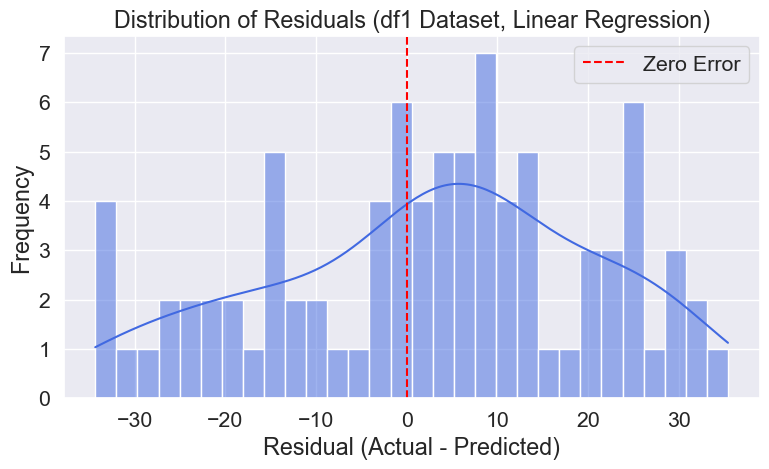

In [194]:
# Compute residuals
residuals = y_test_df1 - y_pred_df1

# Plot residual distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='royalblue', bins=30)

plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (df1 Dataset, Linear Regression)')
plt.legend()
plt.tight_layout()
plt.show()

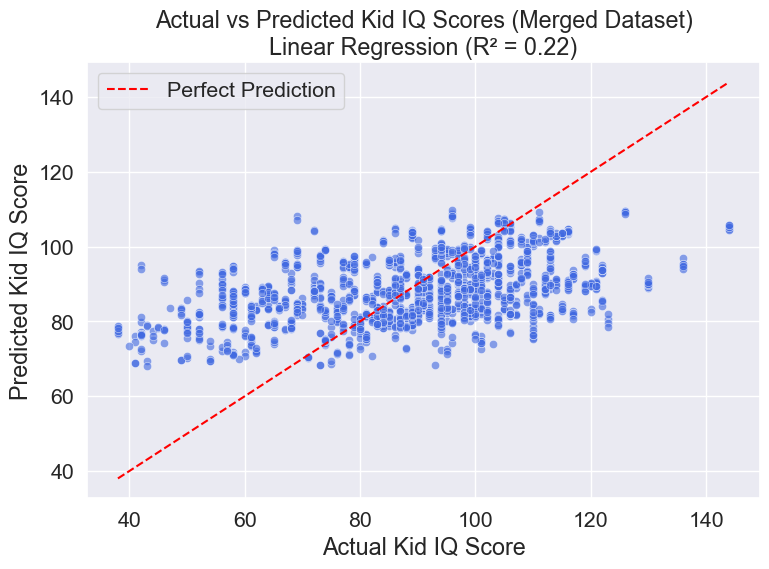

In [195]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_merged, y=y_pred_merged, alpha=0.6, color='royalblue')
plt.plot([y_test_merged.min(), y_test_merged.max()], [y_test_merged.min(), y_test_merged.max()], color='red', linestyle='--', label='Perfect Prediction')

r2 = r2_score(y_test_merged, y_pred_merged)
plt.xlabel('Actual Kid IQ Score')
plt.ylabel('Predicted Kid IQ Score')
plt.title(f'Actual vs Predicted Kid IQ Scores (Merged Dataset)\nLinear Regression (R² = {r2:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [196]:


# Initialize models dictionary with -1 suffix
models_1 = {
    "Linear Regression-1": LinearRegression(),
    "Random Forest-1": RandomForestRegressor(random_state=42),
    "Gradient Boosting-1": GradientBoostingRegressor(random_state=42),
    "XGBoost-1": XGBRegressor(random_state=42, verbosity=0)
}

# Apply preprocessing to test data
X_test_scaled_merged = preprocessor_merged.transform(X_test_merged)
X_test_scaled_merged = pd.DataFrame(
    X_test_scaled_merged.toarray() if hasattr(X_test_scaled_merged, 'toarray') else X_test_scaled_merged,
    columns=all_features_merged,
    index=X_test_merged.index
)

# Train, predict, and evaluate
for name, model in models_1.items():
    # Fit model
    model.fit(X_train_scaled_merged, y_train_merged)
    
    # Predict
    y_pred = model.predict(X_test_scaled_merged)
    
    # Evaluate
    mae_1 = mean_absolute_error(y_test_merged, y_pred)
    rmse_1 = np.sqrt(mean_squared_error(y_test_merged, y_pred))
    r2_1 = r2_score(y_test_merged, y_pred)
    
    print(f"{name} Results:")
    print(f"  MAE-1: {mae_1:.3f}")
    print(f"  RMSE-1: {rmse_1:.3f}")
    print(f"  R2-1: {r2_1:.3f}\n")


Linear Regression-1 Results:
  MAE-1: 13.194
  RMSE-1: 16.697
  R2-1: 0.215

Random Forest-1 Results:
  MAE-1: 2.330
  RMSE-1: 7.006
  R2-1: 0.862

Gradient Boosting-1 Results:
  MAE-1: 10.036
  RMSE-1: 12.759
  R2-1: 0.542

XGBoost-1 Results:
  MAE-1: 3.520
  RMSE-1: 6.648
  R2-1: 0.876



## Ensemble Learning models without hyperparameter initialisation

In [197]:

# Initialise models without hyperparameter tuning
models_1 = {
    "Random Forest-1": RandomForestRegressor(random_state=42),
    "Gradient Boosting-1": GradientBoostingRegressor(random_state=42),
    "XGBoost-1": XGBRegressor(random_state=42, verbosity=0)
}

# Apply preprocessing to test data
X_test_scaled_merged = preprocessor_merged.transform(X_test_merged)
X_test_scaled_merged = pd.DataFrame(
    X_test_scaled_merged.toarray() if hasattr(X_test_scaled_merged, 'toarray') else X_test_scaled_merged,
    columns=all_features_merged,
    index=X_test_merged.index
)

# Train, predict, and evaluate
for name, model in models_1.items():
    # Fit model
    model.fit(X_train_scaled_merged, y_train_merged)
    
    # Predict
    y_pred = model.predict(X_test_scaled_merged)
    
    # Evaluate
    mae_1 = mean_absolute_error(y_test_merged, y_pred)
    rmse_1 = np.sqrt(mean_squared_error(y_test_merged, y_pred))
    r2_1 = r2_score(y_test_merged, y_pred)
    
    print(f"{name} Results:")
    print(f"  MAE-1: {mae_1:.3f}")
    print(f"  RMSE-1: {rmse_1:.3f}")
    print(f"  R2-1: {r2_1:.3f}\n")


Random Forest-1 Results:
  MAE-1: 2.330
  RMSE-1: 7.006
  R2-1: 0.862

Gradient Boosting-1 Results:
  MAE-1: 10.036
  RMSE-1: 12.759
  R2-1: 0.542

XGBoost-1 Results:
  MAE-1: 3.520
  RMSE-1: 6.648
  R2-1: 0.876



## Ensemble Learning initialisation with hyperparameter

In [198]:
# Creating a dictionary of model to be run
models = { # GridSearchCV, we only need the base regressor here. The hyperparameters will be defined in param_grid.
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0, eval_metric='rmse') # eval_metric added for XGBoost to suppress warning
}

# --- Define Parameter Grids for Each Model ---
# This is where you specify the hyperparameter ranges to search
param_grids = {
    'Random Forest': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [3, 10, None],
        'regressor__min_samples_split': [2, 5],
        'regressor__max_features': ['sqrt', 'log2', None]  # Controls randomness
    },
    'Gradient Boosting': {
        'regressor__n_estimators': [50, 100, 150],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5],
        'regressor__subsample': [0.8, 1.0]  # Like XGBoost's
    },
    'XGBoost': {
        'regressor__n_estimators': [50, 100, 150],
        'regressor__learning_rate': [0.01, 0.1],
        'regressor__max_depth': [3, 10],
        'regressor__subsample': [0.8, 1.0],
        'regressor__colsample_bytree': [0.8, 1.0],  # Column sampling
        'regressor__gamma': [0, 1]  # Minimum loss reduction
    }
}


## Ensemble Learning with hyperparameter tuning and model evaluation loop

In [199]:

def run_model_comparison(X_train, X_test, y_train, y_test, preprocessor, models, param_grids):
    best_models = {}

    for name, model in models.items():
        print(f"\n--- Running GridSearchCV for {name} ---")

        pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('regressor', model)
        ])

        current_param_grid = param_grids[name]

        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=current_param_grid,
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X_train, y_train)

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation MSE for {name}: {-grid_search.best_score_:.2f}")

        best_pipeline = grid_search.best_estimator_
        y_pred = best_pipeline.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f"\n{name} Results (Test Set):")
        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²: {r2:.4f}")

        best_models[name] = {
            'model': best_pipeline,
            'mae': mae,
            'rmse': rmse,
            'r2': r2
        }

            # --- Identify the best performing model based on highest R² ---
    best_model_name = max(best_models, key=lambda k: best_models[k]['r2'])
    best_model_info = best_models[best_model_name]

    print("\n================ Best Performing Model ================")
    print(f"Model: {best_model_name}")
    print(f"R²: {best_model_info['r2']:.4f}")
    print(f"MAE: {best_model_info['mae']:.4f}")
    print(f"RMSE: {best_model_info['rmse']:.4f}")
    print("=======================================================")

    return best_models, best_model_name, best_model_info

    #return best_models


In [200]:
# Run on df1
results_df1 = run_model_comparison(X_train_df1, X_test_df1, y_train_df1, y_test_df1,
                                   preprocessor_df1, models, param_grids)



--- Running GridSearchCV for Random Forest ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Random Forest: {'regressor__max_depth': 3, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best cross-validation MSE for Random Forest: 350.36

Random Forest Results (Test Set):
  MAE: 14.31
  RMSE: 17.3169
  R²: 0.2017

--- Running GridSearchCV for Gradient Boosting ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Gradient Boosting: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 150, 'regressor__subsample': 0.8}
Best cross-validation MSE for Gradient Boosting: 350.97

Gradient Boosting Results (Test Set):
  MAE: 14.78
  RMSE: 17.7718
  R²: 0.1592

--- Running GridSearchCV for XGBoost ---
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for XGBoost: {'regressor__colsample_bytree': 1.0, 'regressor__g

In [201]:

# Run on merged dataset
results_merged = run_model_comparison(X_train_merged, X_test_merged, y_train_merged, y_test_merged,
                                      preprocessor_merged, models, param_grids)


--- Running GridSearchCV for Random Forest ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Random Forest: {'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Best cross-validation MSE for Random Forest: 38.32

Random Forest Results (Test Set):
  MAE: 2.21
  RMSE: 6.5981
  R²: 0.8774

--- Running GridSearchCV for Gradient Boosting ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Gradient Boosting: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__n_estimators': 150, 'regressor__subsample': 1.0}
Best cross-validation MSE for Gradient Boosting: 34.26

Gradient Boosting Results (Test Set):
  MAE: 3.57
  RMSE: 5.8772
  R²: 0.9028

--- Running GridSearchCV for XGBoost ---
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for XGBoost: {'regressor__colsample_bytree': 1.0, 'regressor__gamma': 

In [202]:
# Unpack results from merged dataset 
best_models, best_model_name, best_model_info = results_merged

# Extract the fitted best model pipeline
best_pipeline = best_model_info['model']
best_r2 = best_model_info['r2']  # Extract R²

# Predictions
y_pred_best = best_pipeline.predict(X_test_merged)

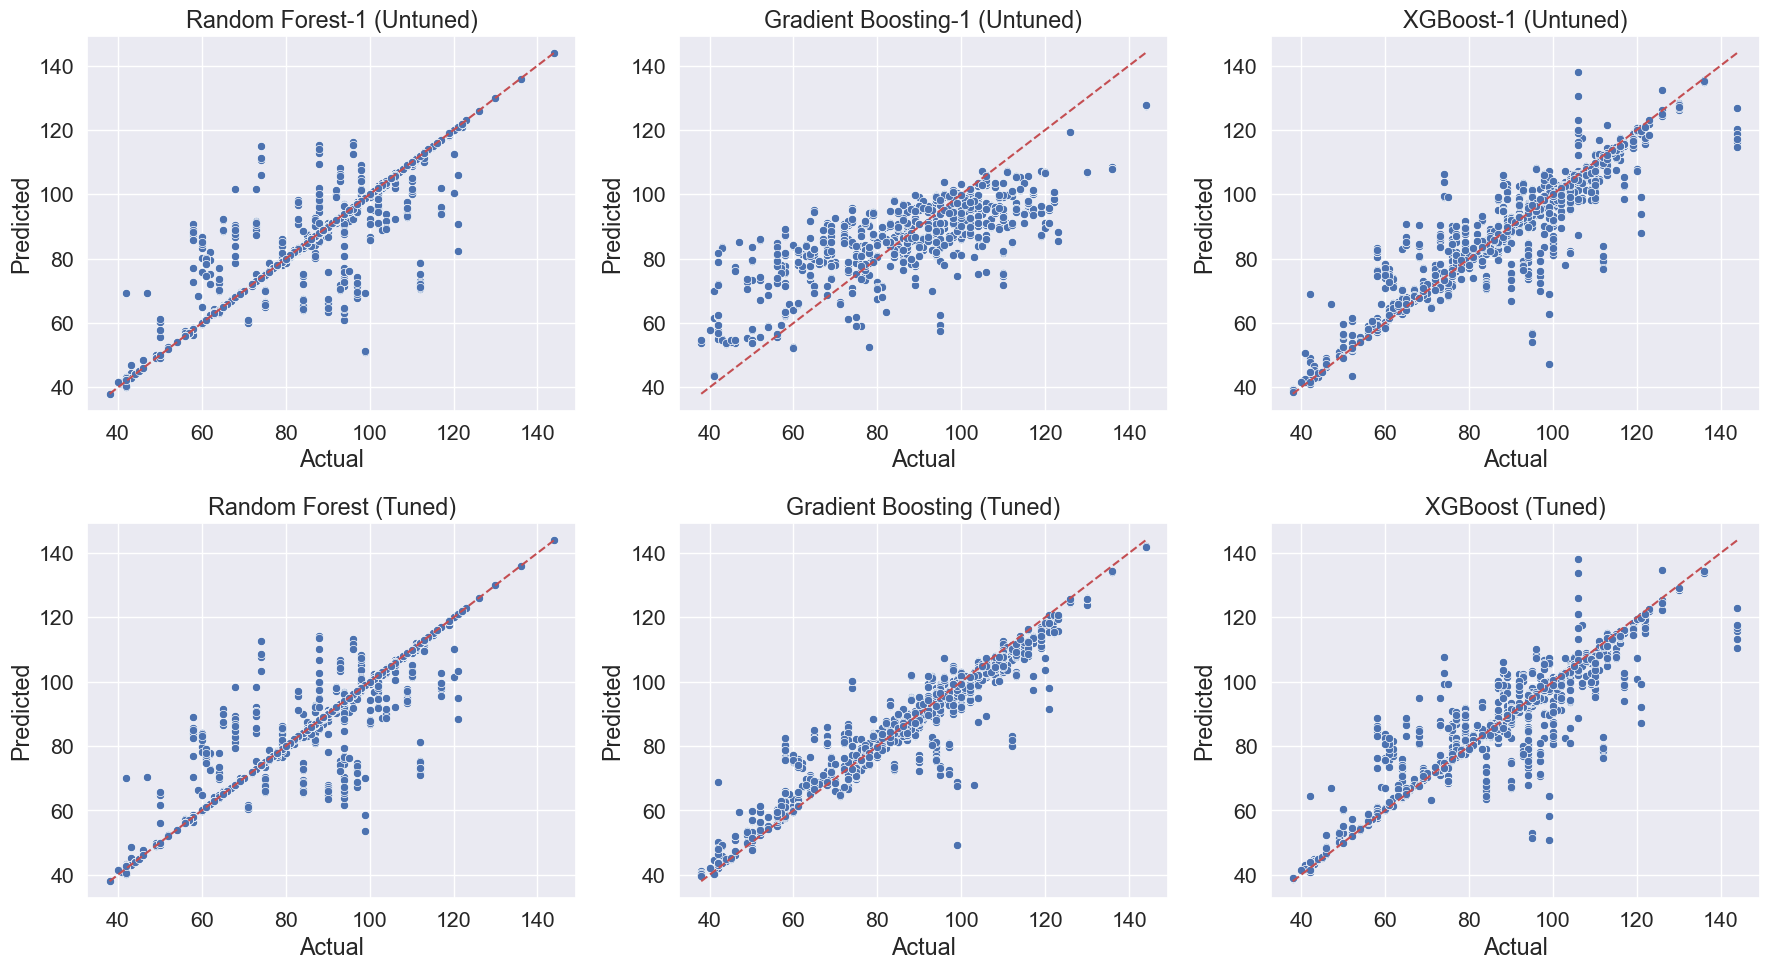

In [203]:
# displaying the comparison prediction plot for each model

def plot_predicted_vs_actual_grid(X_test_scaled_untuned, X_test_tuned, y_test, untuned_models, tuned_models, n_cols=3):
    """
    Plots Predicted vs Actual for untuned and tuned models in a grid format.
    
    Parameters:
    - X_test_scaled_untuned: Preprocessed test features for untuned models
    - X_test_tuned: Raw test features for tuned models (pipelines include preprocessing)
    - y_test: True target values
    - untuned_models: Dictionary of untuned models {'Model Name': model_object}
    - tuned_models: Dictionary of tuned models {'Model Name': pipeline_object}
    - n_cols: Number of columns per row
    """
    all_models = list(untuned_models.items()) + list(tuned_models.items())
    total_models = len(all_models)
    n_rows = math.ceil(total_models / n_cols)
    
    plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    
    idx = 1
    # Untuned models
    for name, model in untuned_models.items():
        y_pred = model.predict(X_test_scaled_untuned)
        plt.subplot(2, n_cols, idx)  # Top row
        sns.scatterplot(x=y_test, y=y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"{name} (Untuned)")
        plt.grid(True)
        idx += 1

    # Tuned models
    for name, pipeline in tuned_models.items():
        y_pred = pipeline.predict(X_test_tuned)
        plt.subplot(2, n_cols, idx)  # Bottom row
        sns.scatterplot(x=y_test, y=y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"{name} (Tuned)")
        plt.grid(True)
        idx += 1

    plt.tight_layout()
    plt.savefig("prediction_comparison.png")
    plt.show()


# --- Example usage ---
tuned_models = {name: info['model'] for name, info in best_models.items()}

plot_predicted_vs_actual_grid(
    X_test_scaled_merged,  # Untuned models
    X_test_merged,         # Tuned models (pipeline includes preprocessing)
    y_test_merged,
    untuned_models=models_1,
    tuned_models=tuned_models,
    n_cols=3
)


In [204]:
# ================================
# Run Model Comparison
# ================================
best_models, best_model_name, best_model_info = run_model_comparison(
    X_train_merged, X_test_merged, y_train_merged, y_test_merged,
    preprocessor_merged, models, param_grids
)

# Extract the best pipeline & regressor
best_pipeline = best_model_info['model']
regressor = best_pipeline.named_steps['regressor']
r2 = best_model_info['r2']

# Get feature names from preprocessor
all_features = list(best_pipeline.named_steps['preprocessing'].get_feature_names_out())





--- Running GridSearchCV for Random Forest ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Random Forest: {'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Best cross-validation MSE for Random Forest: 38.32

Random Forest Results (Test Set):
  MAE: 2.21
  RMSE: 6.5981
  R²: 0.8774

--- Running GridSearchCV for Gradient Boosting ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Gradient Boosting: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__n_estimators': 150, 'regressor__subsample': 1.0}
Best cross-validation MSE for Gradient Boosting: 34.26

Gradient Boosting Results (Test Set):
  MAE: 3.57
  RMSE: 5.8772
  R²: 0.9028

--- Running GridSearchCV for XGBoost ---
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for XGBoost: {'regressor__colsample_bytree': 1.0, 'regressor__gamma': 

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">7. Feature Importance</p>
</div>

C:\Users\CHUKS\AppData\Local\Temp\ipykernel_18324\3282822475.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi, palette='viridis')


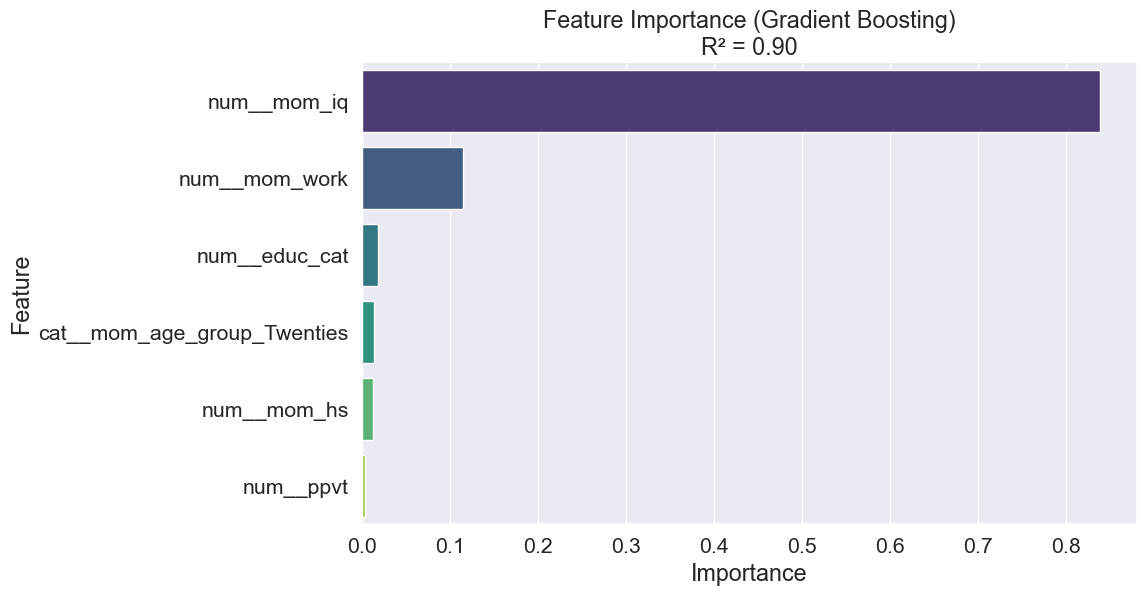

✅ Feature importance saved to 'feature_importance.xlsx'


In [205]:
# ================================
# Feature Importance (Tree Models Only)
# ================================
if hasattr(regressor, "feature_importances_"):
    fi = pd.DataFrame({
        'Feature': all_features,
        'Importance': regressor.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=fi, palette='viridis')
    plt.title(f"Feature Importance ({best_model_name})\nR² = {r2:.2f}")
    plt.savefig("fi.png")
    plt.show()

    # Save Feature Importance
    fi['Importance'] = fi['Importance'].round(4)
    fi.to_excel("feature_importance.xlsx", index=False)
    print("✅ Feature importance saved to 'feature_importance.xlsx'")
else:
    print(f"{best_model_name} does not provide native feature_importances_.")


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">8. SHAP explainability</p>
</div>

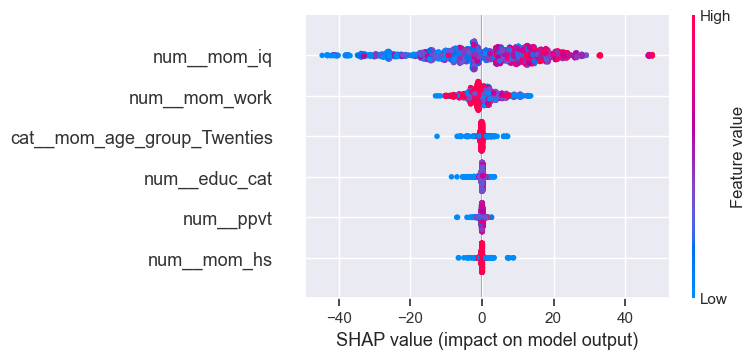

<Figure size 800x500 with 0 Axes>

In [206]:
# Transform test data
X_test_transformed = best_pipeline.named_steps['preprocessing'].transform(X_test_merged)

# Create SHAP explainer (tree models: TreeExplainer preferred)
if best_model_name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
    explainer = shap.TreeExplainer(regressor)
else:
    explainer = shap.Explainer(regressor, X_test_transformed)

shap_values = explainer(X_test_transformed)

# Global importance plot
shap.summary_plot(
    shap_values,
    features=X_test_transformed,
    feature_names=all_features
)
plt.savefig("shap plot.png")


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">8. Saving the model</p>
</div>

In [207]:

# ================================
# Save Model + Dataset
# ================================
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_pipeline, f)

with open('dataset.pkl', 'wb') as f:
    pickle.dump({
        'X_train': X_train_merged,
        'X_test': X_test_merged,
        'y_train': y_train_merged,
        'y_test': y_test_merged,
        'df': merged_clean_df
    }, f)

print(f"\n✅ Best model ({best_model_name}) saved as 'best_model.pkl' and dataset saved as 'dataset.pkl'.")



✅ Best model (Gradient Boosting) saved as 'best_model.pkl' and dataset saved as 'dataset.pkl'.


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">9. Building the App - Defining the functions</p>
</div>

In [208]:

# Function to gather user input for your dataset columns
def get_input():
    # Numeric inputs
    mom_hs = st.sidebar.number_input('Mother\'s High School Score (mom_hs)', min_value=0, max_value=1, step=1, value=0)
    mom_iq = st.sidebar.number_input('Mother\'s IQ (mom_iq)', min_value=50, max_value=160, step=1, value=110)
    mom_work = st.sidebar.number_input('Mother\'s Work Hours per Week (mom_work)', min_value=1, max_value=4, step=1, value=1)
    ppvt = st.sidebar.number_input('PPVT Score (ppvt)', min_value=0, max_value=200, step=1, value=100)
    educ_cat = st.sidebar.number_input('Mother\'s Education Category (educ_cat)', min_value=1, max_value=4, step=1, value=1)
    
    mom_age_group = st.sidebar.selectbox('Mother Age Group', ['Teenager', 'Twenties']
    )
    
    data = {
        'mom_hs': mom_hs,
        'mom_iq': mom_iq,
        'mom_work': mom_work,
        'ppvt': ppvt,
        'educ_cat': educ_cat,
        'mom_age_group': mom_age_group
        #f'mom_age_group_{mom_age_group}': 'Teenager',
    }  
    return data

# Example usage
data = get_input()
data

2025-08-24 22:49:32.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 22:49:32.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 22:49:32.309 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 22:49:32.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 22:49:32.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 22:49:32.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 22:49:32.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-24 22:49:32.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

{'mom_hs': 0,
 'mom_iq': 110,
 'mom_work': 1,
 'ppvt': 100,
 'educ_cat': 1,
 'mom_age_group': 'Teenager'}

In [209]:
def prepare_input(data, feature_list):
    # For each feature in the expected list, get from data dict or use 0 if missing
    input_data = {feature: data.get(feature, 0) for feature in feature_list}
    # Return as 2D array (1 sample)
    return np.array([list(input_data.values())])

# List of features in the exact order your model expects
features = ['mom_hs', 'mom_iq', 'mom_work', 'ppvt', 'educ_cat', 'mom_age_group']

# Example usage:
input_array = prepare_input(data, features)
print(input_array)

[['0' '110' '1' '100' '1' 'Teenager']]


In [210]:
# Create DataFrame with one row
input_df = pd.DataFrame([data])
input_df

,mom_hs,mom_iq,mom_work,ppvt,educ_cat,mom_age_group
0,0,110,1,100,1,Teenager


In [211]:
prediction = best_pipeline.predict(input_df)
print("Predicted kid_score:", prediction[0])


Predicted kid_score: 101.47206809731712


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:300%;
           font-family:Arial;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:40px; color:white; text-align:center">10. VS Code Python scripts</p>
</div>